In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dec = pd.read_csv("Fraud_check.csv")

In [3]:
dec.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
dec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
dec.shape

(600, 6)

In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [10]:
lab_enc = preprocessing.LabelEncoder()
dec['Urban'] = lab_enc.fit_transform(dec['Urban'])

In [11]:
lab_enc = preprocessing.LabelEncoder()
dec['Marital.Status'] = lab_enc.fit_transform(dec['Marital.Status'])

In [12]:
lab_enc = preprocessing.LabelEncoder()
dec['Undergrad'] = lab_enc.fit_transform(dec['Undergrad'])

In [13]:
dec.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [16]:
X = dec.iloc[:,0:5].values
y = dec.iloc[:,-1].values

In [17]:
X

array([[     0,      2,  68833,  50047,     10],
       [     1,      0,  33700, 134075,     18],
       [     0,      1,  36925, 160205,     30],
       ...,
       [     0,      0,  47334, 154058,      0],
       [     1,      1,  98592, 180083,     17],
       [     0,      0,  96519, 158137,     16]], dtype=int64)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

# Split into training and testing

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=0)

# Model Creation

In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="gini")
model.fit(X_train,y_train)

DecisionTreeClassifier()

# Model Validation: confusion matrix


In [23]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [25]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[41, 36],
       [37, 36]], dtype=int64)

In [26]:
accuracy_score(y_test,y_pred)

0.5133333333333333

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.53      0.53        77
           1       0.50      0.49      0.50        73

    accuracy                           0.51       150
   macro avg       0.51      0.51      0.51       150
weighted avg       0.51      0.51      0.51       150



In [28]:
# Accuracy of training dataset

In [29]:
y_pred1 = model.predict(X_train)

In [30]:
accuracy_score(y_train,y_pred1)

1.0

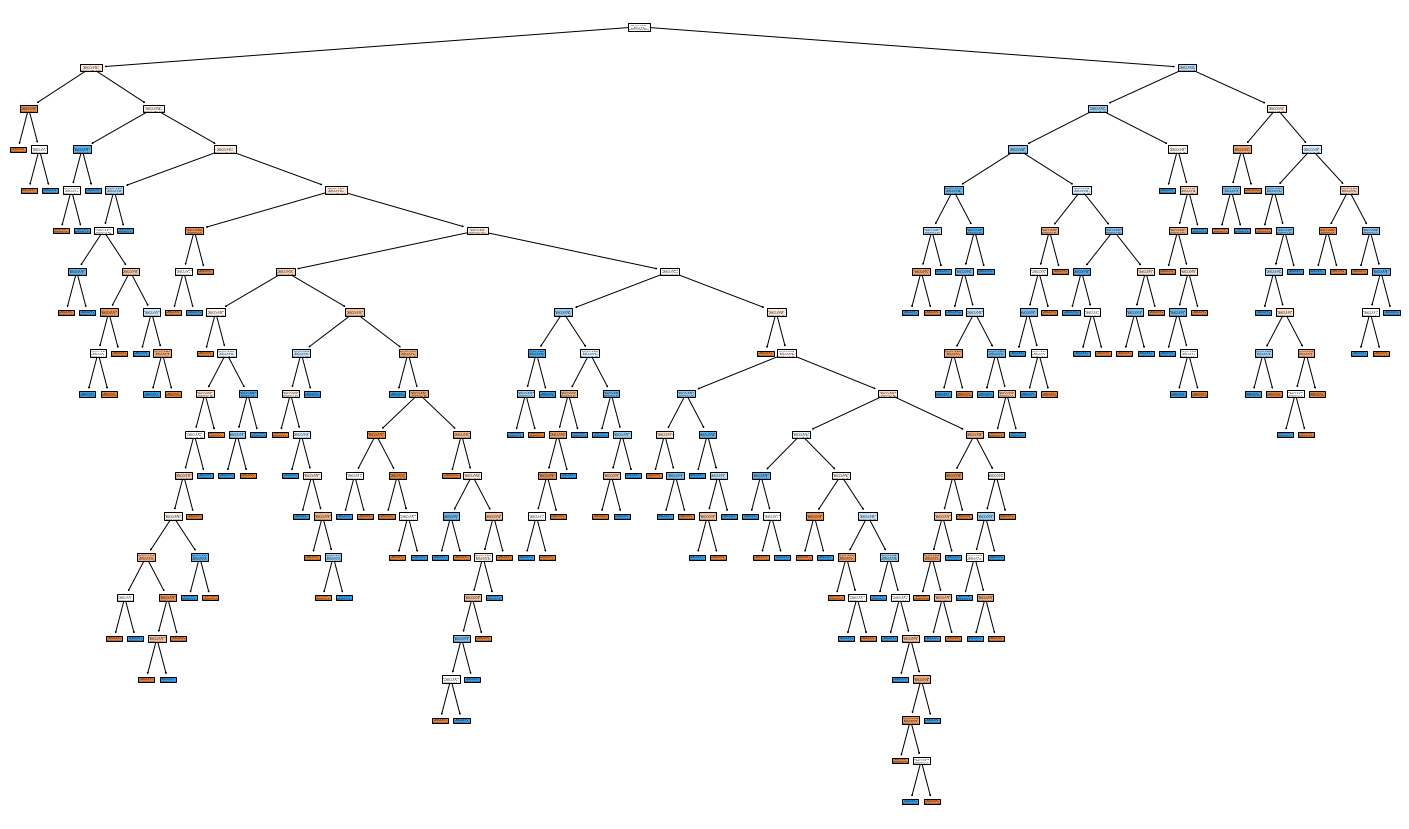

In [31]:
plt.figure(figsize=(25,15))
tree.plot_tree(model,filled=True)

plt.show()